In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import csv
import cv2
import scipy.stats as stats
import scipy
import pickle
import pandas

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle as shuffle

In [3]:
%matplotlib inline

In [77]:
def load_dataset():
    samples = []
    with open('./data/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        header = True
        for line in reader:
            if not header:
                samples.append(line)
            header = False

    return samples

In [83]:
samples = load_dataset()
dataset = np.array(samples)
steering_data = dataset[:,3]
steering_data = steering_data.astype(np.float32)
speed_data = dataset[:,6]
speed_data = speed_data.astype(np.float32)

In [79]:
def display_distribution(X,Y,title="Dataset Set Distribution"):
    bin_count = np.bincount(Y)
    y_pos = np.arange(len(sign_names))
    plt.bar(y_pos, bin_count)
    plt.xticks(y_pos, np.arange(len(sign_names)))
    plt.ylabel('Occurance in dataset')
    plt.xlabel('Traffic sign id')
    plt.title(title)
    plt.show()

DescribeResult(nobs=8036, minmax=(-0.94269538, 1.0), mean=0.0040696422, variance=0.016599763, skewness=-0.13028928637504578, kurtosis=6.311554415049061)


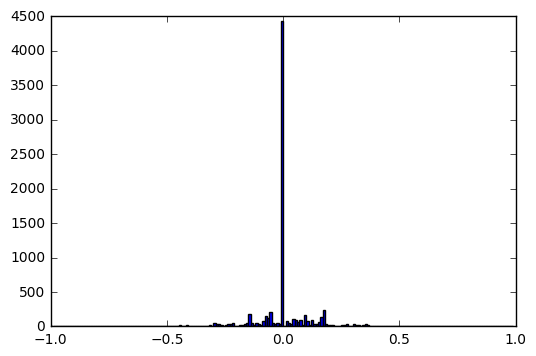

In [80]:
#  col 4 is the steering angle
print(stats.describe(steering_data))
bins = np.arange(-1,1,.01)
plt.hist(steering_data,bins=bins)
plt.show()

DescribeResult(nobs=8036, minmax=(0.50248963, 30.70936), mean=28.169842, variance=37.814228, skewness=-3.1954026222229004, kurtosis=9.218215161884428)


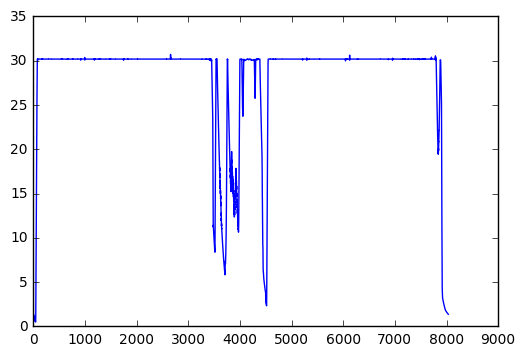

In [91]:
#  col 4 is the steering angle
print(stats.describe(speed_data))
minmax = stats.describe(speed_data).minmax

bins = np.arange(minmax[0],minmax[1],.1)
# plt.hist(speed_data,bins=bins)
plt.plot(speed_data)
plt.show()

Dataset size          8036
zero steer occurance  4361
non zero steer occurance  3675


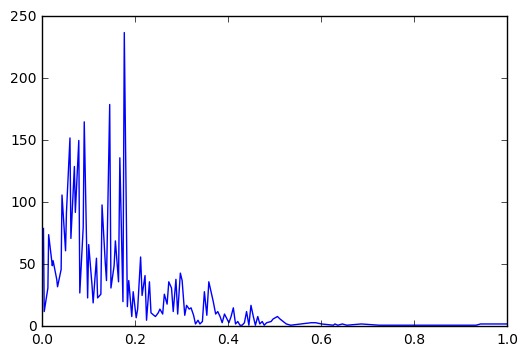

In [184]:
abs_steering = np.abs(steering_data)
x = np.unique(abs_steering,return_counts=True)

# without steering angle zero
plt.plot(x[0][1:],x[1][1:])
print("Dataset size         ", len(abs_steering))
print("zero steer occurance ", x[1][0])
print("non zero steer occurance ", len(abs_steering) - x[1][0])


In [7]:
def load_dataset():
    samples = []
    with open('./data/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        header = True
        for line in reader:
            if not header:
                samples.append(line)
            header = False

    return samples

In [8]:
dataset[0]

array(['IMG/center_2016_12_01_13_30_48_287.jpg',
       ' IMG/left_2016_12_01_13_30_48_287.jpg',
       ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0',
       ' 22.14829'], 
      dtype='<U38')

In [9]:
non_zero_steer_samples = dataset[np.where(dataset[:,3] != ' 0')]
zero_steer_samples = dataset[np.where(dataset[:,3] == ' 0')]
print(len(dataset),len(non_zero_steer_samples),len(zero_steer_samples))
max_count_of_non_zero_steer = np.max(np.unique(non_zero_steer_samples[:,3],return_counts=True)[1])
selected_zero_steer_samples = zero_steer_samples[np.random.choice(np.arange(len(zero_steer_samples)),size=max_count_of_non_zero_steer)]
balanced_dataset = np.append(non_zero_steer_samples,selected_zero_steer_samples,axis=0)


8036 3675 4361


DescribeResult(nobs=3912, minmax=(-0.94269538, 1.0), mean=0.0083598271, variance=0.034067705, skewness=-0.16078975796699524, kurtosis=1.55421157973832)


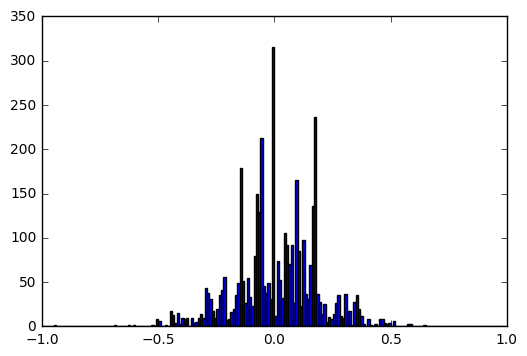

In [10]:
balanced_steering_data = balanced_dataset[:,3]
balanced_steering_data = balanced_steering_data.astype(np.float32)
print(stats.describe(balanced_steering_data))
bins = np.arange(-1,1,.01)
plt.hist(balanced_steering_data,bins=bins)
plt.show()

* Balance the number of zero steering within range.
* Steering correction for left and right images
* Crop images on top and bottom
* Record recovery dataset.
* add regularisation
* data augmantation
    * Flip images 
    * Shear images
     
    

In [9]:
def flip_image(img,steering_angle):
    return cv2.flip(img,1), -steering_angle

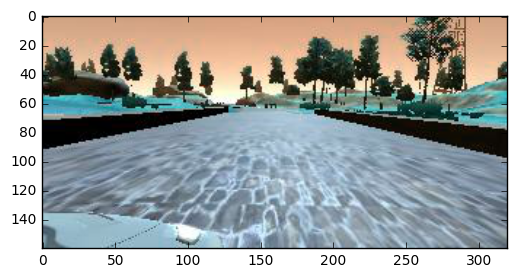

In [12]:
left = cv2.imread("./data/IMG/right_2016_12_01_13_30_48_404.jpg")
right = cv2.imread("./data/IMG/left_2016_12_01_13_30_48_404.jpg")
center = cv2.imread("./data/IMG/center_2016_12_01_13_30_48_404.jpg")
plt.imshow(left,cmap="gray")


In [ ]:
plt.imshow(right,cmap="gray")
plt.imshow(center,cmap="gray")

In [43]:
type(dataset[250][0])


numpy.str_

NameError: name 'dataset' is not defined

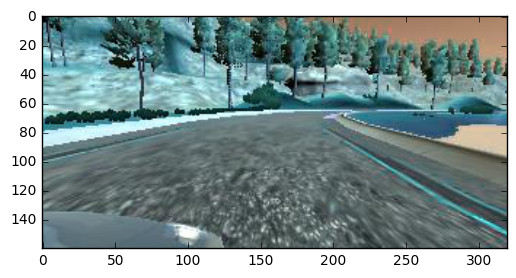

In [71]:
def flip_image(img):
    return cv2.flip(img, 1)

center = cv2.imread('./data/IMG/' + dataset[250][0].split('/')[-1])
left =   cv2.imread('./data/IMG/' + dataset[250][1].split('/')[-1])
right =  cv2.imread('./data/IMG/' + dataset[250][2].split('/')[-1])
ss = float(dataset[250][3])
dataset[250][0]

plt.imshow(right)


0.1574452


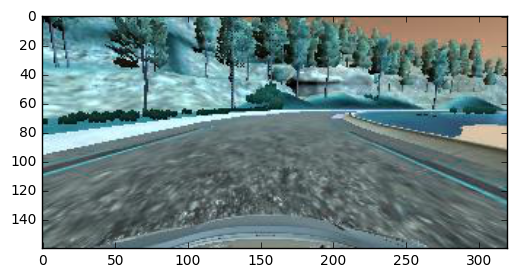

In [27]:
print(ss)
plt.imshow(center)

0.1574452


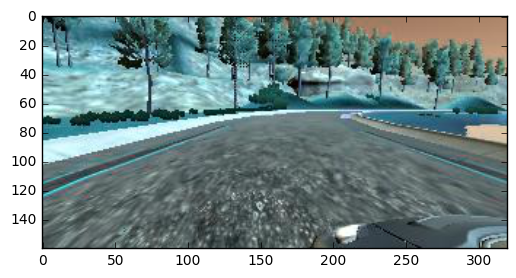

In [8]:
print(ss)
plt.imshow(left)

(160, 320, 3)


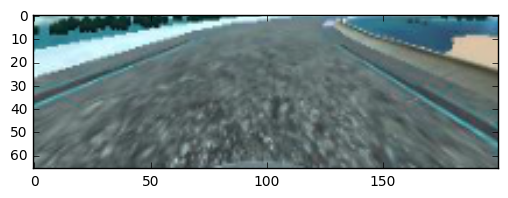

In [73]:
print(left.shape)
p = cv2.resize(center[65:140,:,:], (200, 66))
plt.imshow(p)

(160, 320, 3)


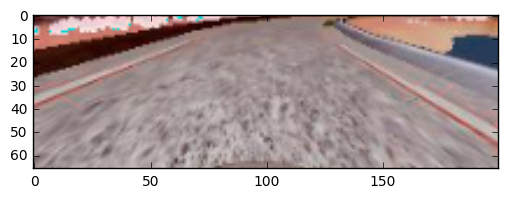

In [76]:
print(left.shape)
p = cv2.resize(center[65:140,:,:], (200, 66))
plt.imshow(p.astype(np.float32))

(55, 200, 3)


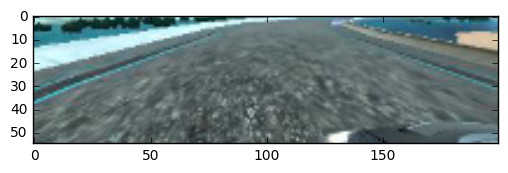

In [69]:
p = cv2.resize(left, (200, 100))
p = p[40:95,:,:]
print(p.shape)
plt.imshow(p)

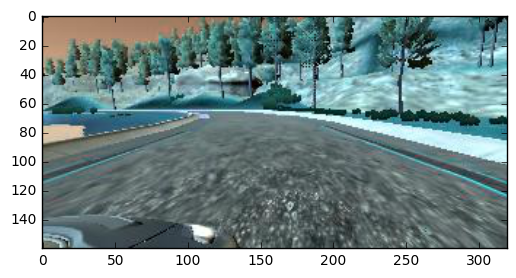

In [68]:
plt.imshow(cv2.flip(left,1))
plt.show()

In [16]:
import tensorflow as tf

In [17]:
 with tf.Session() as sess:
    X_train = sess.run(tf.image.resize_images(np.array([left]), [66, 200]))
    sess.close()

print(X_train.shape)
X_train.shape == (1,66,200,3)

(1, 66, 200, 3)


True

In [78]:
left.shape

(160, 320, 3)

(1, 160, 320, 3)


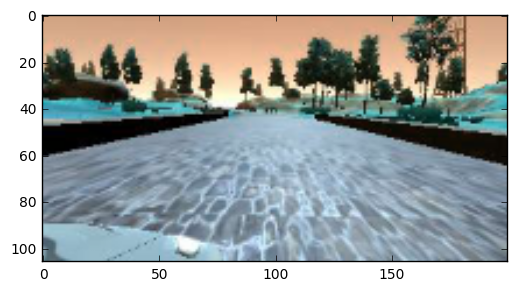

In [81]:
l = np.array([left])
print(l.shape)

resized = cv2.resize(l[0],(200,106))
plt.imshow(resized)
resized.shape
xx = np.array([resized])

In [71]:
def pre_process_img(image):
    return cv2.cvtColor(left,cv2.COLOR_BGR2YUV)

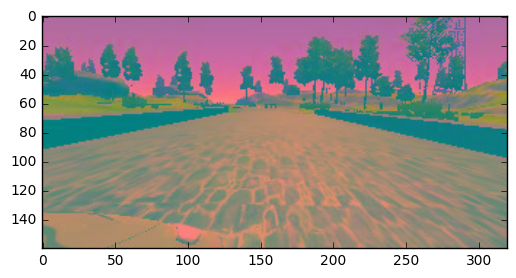

In [75]:
yuv_left = cv2.cvtColor(left,cv2.COLOR_BGR2YUV)
plt.imshow(yuv_left)
plt.show()

In [79]:
print(xx.shape)
print(X_train.shape)

xx.shape == X_train.shape
xx.dtype
X_train.dtype

(1, 66, 200, 3)
(1, 66, 200, 3)


dtype('float32')

In [83]:
len(os.listdir('./model/steering/'))
str('./model/steering/model_' + str(1) + '.h5')

'./model/steering/model_1.h5'

In [29]:
def load_dataset():
    samples = []
    with open('./data/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        header = True
        for line in reader:
            if not header:
                samples.append(line)
            header = False

    balanced_dataset = balance_dataset(np.array(samples))
    train_samples, validation_samples = train_test_split(balanced_dataset, test_size=0.2)
    return train_samples, validation_samples


def balance_dataset(dataset):
    # data set mostly of zero steer
    # so balance the dataset to remove bias
    non_zero_steer_samples = dataset[np.where(dataset[:, 3] != ' 0')]
    zero_steer_samples = dataset[np.where(dataset[:, 3] == ' 0')]
    print("Original ", len(dataset), "Non zero steering ", len(non_zero_steer_samples), "Zero steering ",
          len(zero_steer_samples))
    max_count_of_non_zero_steer = np.max(np.unique(non_zero_steer_samples[:, 3], return_counts=True)[1])
    selected_zero_steer_samples = zero_steer_samples[
        np.random.choice(np.arange(len(zero_steer_samples)), size=max_count_of_non_zero_steer*2)]
    balanced_dataset = np.append(non_zero_steer_samples, selected_zero_steer_samples, axis=0)
    return balanced_dataset

In [30]:
train_samples,validation_samples = load_dataset()

Original  8036 Non zero steering  3675 Zero steering  4361


In [20]:
train_samples[0]

array(['IMG/center_2016_12_01_13_43_57_646.jpg',
       ' IMG/left_2016_12_01_13_43_57_646.jpg',
       ' IMG/right_2016_12_01_13_43_57_646.jpg', ' -0.2116669',
       ' 0.9855326', ' 0', ' 30.18167'], 
      dtype='<U38')

In [31]:
def flip_image(img):
    return cv2.flip(img, 1)

def img_and_steer(samples, batch_size=12):
    num_samples = len(samples)
    while 1:  # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset + batch_size]
            images = []
            angles = []
            for batch_sample in batch_samples:
                name = './data/IMG/' + batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)
                center_steer = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_steer)

                images.append(flip_image(center_image))
                angles.append(center_steer)

                correction = 0.2  # this is a parameter to tune

                name = './data/IMG/' + batch_sample[1].split('/')[-1]
                left_image = cv2.imread(name)
                left_steer = center_steer + correction  # correction
                images.append(left_image)
                angles.append(left_steer)

                images.append(flip_image(left_image))
                angles.append(left_steer * -1.0)

                name = './data/IMG/' + batch_sample[2].split('/')[-1]
                right_image = cv2.imread(name)
                right_steer = center_steer - correction  # correction
                images.append(right_image)
                angles.append(right_steer)

                images.append(flip_image(right_image))
                angles.append(right_steer * -1.0)



            resized  = []
            for img in images:
                resized.append(cv2.resize(img, (200, 106)))

            y_train = np.array(angles)
            X_train = np.array(resized).astype(np.float32)
             
            return shuffle(X_train, y_train)

In [32]:
out = img_and_steer(train_samples,1200)
img = out[0]
steer = out[1]

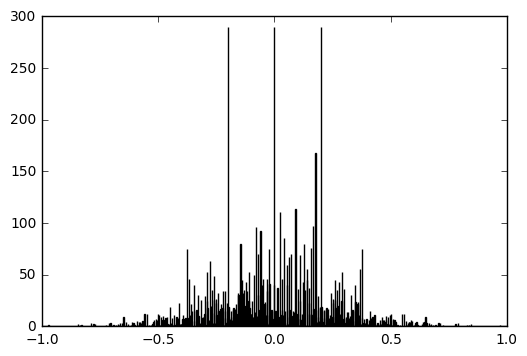

In [33]:
bins = np.arange(-1,1,.001)
plt.hist(steer,bins=bins)
plt.show()

In [25]:
def diaply_images(rows,cols,images,labels):
    gs1 = gridspec.GridSpec(rows,cols)
    gs1.update(wspace=0.01, hspace=0.02)
    plt.figure(figsize=(8,8))
    for i in range(rows * cols):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        rnd_idx = np.random.choice(len(images))
        plt.text(2,5,
                 str(labels[rnd_idx]),
                 color='k',
                 backgroundcolor='c')
        plt.imshow(images[rnd_idx])
        plt.axis('off')

    plt.show()
    

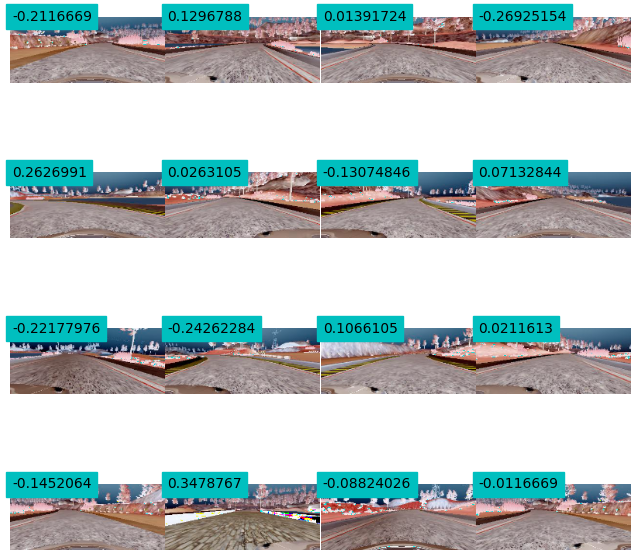

In [62]:
diaply_images(4,4,img,steer)

In [35]:
# Load a pickle file
def load_pickle(file_path):
    with open(file_path, mode='rb') as f:
        file_data = pickle.load(f)
        return file_data;
# Create a pickle    
def create_pickle(file_path,data):
    pickle.dump(data, open(file_path, "wb" ))
    print("Data saved in", file_path)

In [34]:
def plot_train_hist(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()

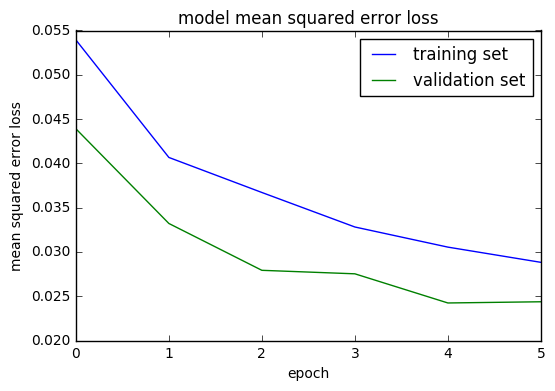

In [38]:
hist = load_pickle('./model/steering/model_10_history.p')
plot_train_hist(hist)

In [138]:
import glob
glob.glob('./model/steering/*.h5')


['./model/steering/model_25.h5',
 './model/steering/model.h5',
 './model/steering/model_7.h5',
 './model/steering/model_19.h5',
 './model/steering/model_20.h5',
 './model/steering/model_21.h5',
 './model/steering/model_24.h5',
 './model/steering/model_11.h5',
 './model/steering/model_14.h5',
 './model/steering/model_28.h5',
 './model/steering/model_9.h5',
 './model/steering/model_13.h5',
 './model/steering/model_1.h5',
 './model/steering/model_6.h5',
 './model/steering/model_27.h5',
 './model/steering/model_15.h5',
 './model/steering/model_23.h5',
 './model/steering/model_4.h5',
 './model/steering/model_22.h5',
 './model/steering/model_5.h5',
 './model/steering/model_17.h5',
 './model/steering/model_2.h5',
 './model/steering/model_8.h5',
 './model/steering/model_26.h5',
 './model/steering/model_10.h5',
 './model/steering/model_12.h5',
 './model/steering/model_29.h5',
 './model/steering/model_18.h5',
 './model/steering/model_16.h5']

In [38]:
import keras
keras.optimizers.Adam(lr=0.001)


Using TensorFlow backend.


In [265]:
def load_dataset():

    paths    = ['./data/driving_log.csv','./data/sharp_turn.csv' ]
#     paths    = ['./data/driving_log_balanced.csv']
    samples  = []
    img_path = []
    angles   = []
    correction = 0.25  # this is a parameter to tune

    for path in paths:
        with open(path) as csvfile:
            reader = csv.reader(csvfile)
            header = True
            for line in reader:
                if not header:
                    name = './data/' + line[0]
                    center_image = cv2.imread(name)
                    center_steer = float(line[3])
                    img_path.append(name)
                    angles.append(center_steer)

                    if center_steer != 99999: 
                        name = './data/' + line[1]
                        left_image = cv2.imread(name)
                        left_steer = center_steer + correction  # correction
                        img_path.append(name)
                        angles.append(left_steer)

                        name = './data/' + line[2]
                        right_image = cv2.imread(name)
                        right_steer = center_steer - correction  # correction
                        img_path.append(name)
                        angles.append(right_steer)
                
                header = False

    return (img_path,angles)

In [275]:
dset = load_dataset()

In [268]:
print(dset[0][0],dset[1][0])

./data/IMG/center_2016_12_01_13_30_48_287.jpg 0.0


In [269]:
def balance_dataset(path,angles):
    # data set mostly of zero steer
    # so balance the dataset to remove bias
#     non_zero_steer_path   = path[np.where(angles != 0)]
#     non_zero_steer_angles = angles[np.where(angles != 0)]
#     zero_steer_path   = path[np.where(angles == 0)]
#     zero_steer_angles = angles[np.where(angles == 0)]
    
#     print("Original ", len(path), "Non zero steering ", len(non_zero_steer_angles), "Zero steering ",
#           len(zero_steer_angles))
#     max_count_of_non_zero_steer = np.max(np.unique(non_zero_steer_angles, return_counts=True)[1])
#     selected_zero_steer_idx = np.random.choice(np.arange(len(zero_steer_angles)), size=max_count_of_non_zero_steer )
#     selected_zero_steer_path   = zero_steer_path[selected_zero_steer_idx]
#     selected_zero_steer_angles = zero_steer_angles[selected_zero_steer_idx]
    
#     x = np.squeeze(np.append(non_zero_steer_path, selected_zero_steer_path))
#     y = np.squeeze(np.append(non_zero_steer_angles, selected_zero_steer_angles))
    return shuffle(path,angles)

In [270]:
len(np.asarray(dset[0]))
x,y = balance_dataset(np.asarray(dset[0]),np.asarray(dset[1]))

DescribeResult(nobs=26322, minmax=(-1.25, 1.25), mean=-0.0059067401830408027, variance=0.11165005777920735, skewness=-0.12865603978053383, kurtosis=2.679093802845302)


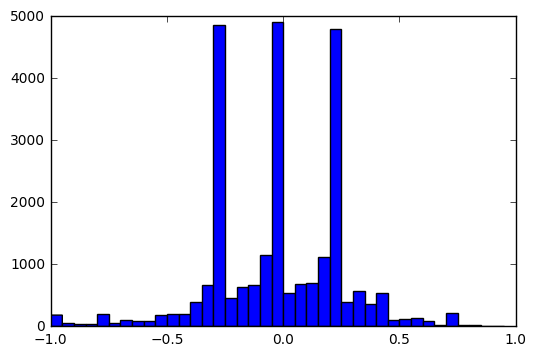

In [271]:
print(stats.describe(y))
bins = np.arange(-1,1,.05)
plt.hist(y,bins=bins)
plt.show()

array([ 0.  ,  0.25, -0.25, ...,  0.  ,  0.25, -0.25])

In [33]:
def augment_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    random_bright = .25 + np.random.uniform()
    image1[:,:,2] = image1[:,:,2] * random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2BGR)
    return image1


In [34]:
def random_translate(image,steeringAngle):
    rows, cols, _ = image.shape
    transRange = 100
    numPixels = 10
    valPixels = 0.4
    transX = transRange * np.random.uniform() - transRange/2
    steeringAngle = steeringAngle + transX/transRange * 2 * valPixels
    transY = numPixels * np.random.uniform() - numPixels/2
    transMat = np.float32([[1,0, transX], [0,1, transY]])
    image = cv2.warpAffine(image, transMat, (cols, rows))
    return image,steeringAngle

In [35]:
def preprocess_image(image):
    # crop & scale
    img = cv2.resize(image[50:140,:,:], (200, 66))
    # blur
    img = cv2.GaussianBlur(img,(3,3),0)
    augment_brightness(img)
    # format
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    return img

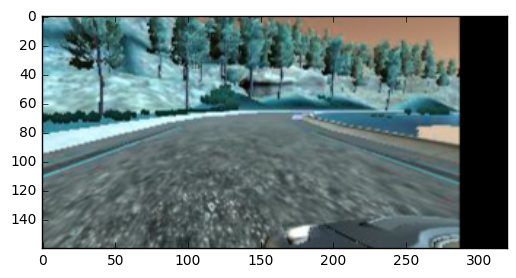

In [329]:
plt.imshow(random_translate(left,0.0)[0])

1.130028027514165


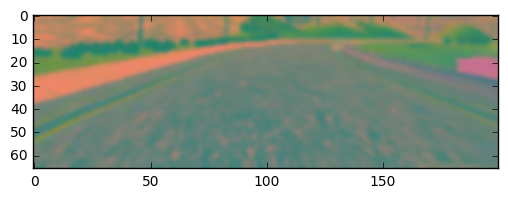

In [308]:
plt.imshow(preprocess_image(left))

In [36]:
def dataset_generator(img_path, angles, batch_size=128):
    print(np.array(img_path).shape,np.array(angles).shape)
    path, angles = shuffle(img_path, angles)
    _X = []
    _y = []
    while True:
        for i in range(len(angles)):
            img = cv2.imread(path[i])
            angle = angles[i]
            processed_img = preprocess_image(img)

            _X.append(processed_img)

            _y.append(angle)

            if len(_X) == batch_size:
#                 print("xxxx ",X[0])
                print("xxxx ", _X[0].shape)
                print(np.asarray(_X).shape,np.asarray(_y).shape)
                yield (np.array(_X), np.array(_y))
                path, angles = shuffle(img_path, angles)
                _X, _y = [], []

#                 flip img
            if abs(angle) > 0.25:
                processed_img = cv2.flip(img, 1)
                processed_img = preprocess_image(processed_img)
                _X.append(img)
                _y.append(angle * -1)
                if len(_X) == batch_size:
                    print("xxxx 1", _X[0].shape)
                    print(np.asarray(_X).shape,np.asarray(_y).shape)
                    yield (np.asarray(_X), np.asarray(_y))
                    path, angles = shuffle(img_path, angles)
                    _X, _y = [], []

            processed_image, new_angle = random_translate(img, angle)
            processed_img = preprocess_image(img)
            _X.append(processed_img)
            _y.append(new_angle)

            if len(_X) == batch_size:
                print("xxxx 2" , _X[0].shape)
                print(np.asarray(_X).shape,np.asarray(_y).shape)
                yield (np.asarray(_X), np.asarray(_y))
                path, angles = shuffle(img_path, angles)
                _X, _y = [], []
            
            
        

In [37]:
a = dataset_generator(dset[0],dset[1])
x,y = next(a)
plt.hist(y)


NameError: name 'dset' is not defined

In [278]:
int(9425/128)

73

-1.0
-0.6
-0.2
0.2
0.6
1.0


In [360]:
x.shape

(128,)

In [352]:
x1,x2,y1,y2 = train_test_split(x,y)

In [353]:
a = dataset_generator(x1,y1)
tt,vv = next(a)


TypeError: bad argument type for built-in operation

In [7]:
lspace = np.linspace(-1, 1, num=200)

In [66]:
from pandas import read_csv
import pandas as pd

In [18]:
df = read_csv('data/driving_log.csv')
df.columns

Index(['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'], dtype='object')

In [147]:
# 2 in range(0,3)
len(np.where((ang[:] > 1) | (ang[:] < -1))[0])

8

In [276]:
path = np.array(dset[0])
ang  = np.array(dset[1])
balanced_path  = np.array([])
balanced_angles = np.array([])
bin_start = -1
max_items_per_bin = 200
count = 0
for bin_end in np.linspace(-1,1,num=200):
    index = np.where((ang[:] >= bin_start) & (ang[:] < bin_end))[0]
    count = count + len(index) 
#     print(bin_start,bin_end,len(index))
    
    selected_ang = ang[index]
    selected_path = path[index]
    
    selected_ang,selected_path = shuffle(selected_ang,selected_path)
    item_count  = min(max_items_per_bin,len(index))
#     print(bin_start,bin_end,len(index), item_count)
    selected_ang = selected_ang[0:item_count]
    selected_path = selected_path[0:item_count]
#     print(bin_start,bin_end,len(index), item_count,len(selected_ang))
    balanced_angles = np.append(balanced_angles,selected_ang)
    balanced_path = np.append(balanced_path,selected_path)
    bin_start = bin_end

print(count, len(path))

25674 26322


In [258]:
np.random.randint(0,100) > 50

False

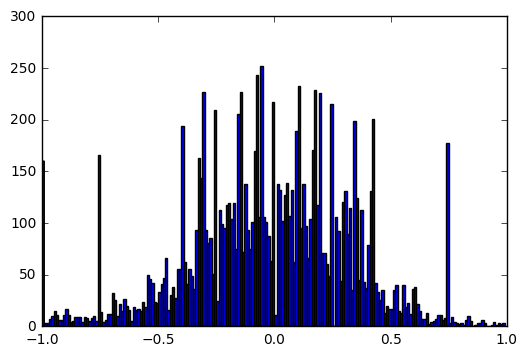

In [274]:
balanced_angles.shape
bins = np.arange(-1,1,.01)
plt.hist(balanced_angles,bins=bins)
plt.show()

In [89]:
df = read_csv('data/driving_log.csv')

balanced = pd.DataFrame()   # Balanced dataset
bins = 1000                 # N of bins
bin_n = 200                 # N of examples to include in each bin (at most)

start = 0
for end in np.linspace(0, 1, num=bins):  
    df_range = df[(np.absolute(df.steering) >= start) & (np.absolute(df.steering) < end)]
    range_n = min(bin_n, df_range.shape[0])
    if(range_n > 0):
        balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end
balanced.to_csv('data/driving_log_balanced.csv', index=False)

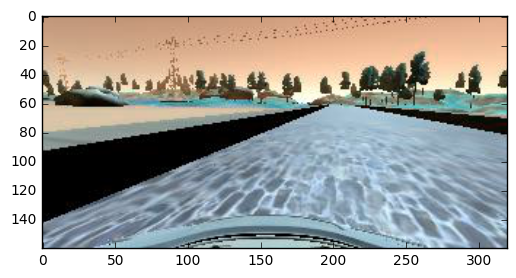

In [284]:
center = cv2.imread('./data/sharp_turn/center_2017_02_10_10_45_38_027.jpg')

plt.imshow(center)

In [6]:
# def load_dataset():
#     paths = ['./data/driving_log.csv','./data/sharp_turn.csv' ]
#     paths = ['./data/driving_log.csv']
#     #paths = ['./data/driving_log_balanced.csv']
    
#     samples = []
#     img_path = []
#     angles = []
#     correction = 0.25  # this is a parameter to tune

#     for path in paths:
#         with open(path) as csvfile:
#             reader = csv.reader(csvfile)
#             header = True
#             for line in reader:
#                 if not header:
#                     name = './data/' + line[0].strip()
#                     center_steer = float(line[3])
#                     img_path.append(name)
#                     angles.append(center_steer)

                    
#                     name = './data/' + line[1].strip()
#                     left_steer = center_steer + correction  # correction
#                     img_path.append(name)
#                     angles.append(left_steer)

#                     name = './data/' + line[2].strip()
#                     right_steer = center_steer - correction  # correction
#                     img_path.append(name)
#                     angles.append(right_steer)

#                 header = False

#     x, y = balance_dataset(np.asarray(img_path), np.asarray(angles))
#     return shuffle(x, y)

def load_dataset():
    paths = ['./data/driving_log.csv']
    paths.append('./data/sharp_turn.csv')
    # paths = ['./data/driving_log_balanced.csv']
    
    samples = []
    img_path = []
    angles = []
    correction = 0.25  # this is a parameter to tune
    x = np.array([])
    y = np.array([])
    udacity = True;
    for path in paths:
        img_path = []
        angles = []
        with open(path) as csvfile:
            reader = csv.reader(csvfile)
            header = True
            for line in reader:
                if not header:
                    name = './data/' + line[0].strip()
                    center_steer = float(line[3])
                    img_path.append(name)
                    angles.append(center_steer)

                    name = './data/' + line[1].strip()
                    left_steer = center_steer + correction  # correction
                    if np.abs(left_steer) <= 1 :
                        img_path.append(name)
                        angles.append(left_steer)

                    name = './data/' + line[2].strip()
                    right_steer = center_steer - correction  # correction
                    if np.abs(right_steer) <= 1 :
                        img_path.append(name)
                        angles.append(right_steer)

                header = False
            print(len(img_path),len(angles))    
            if udacity:
                x, y = balance_dataset(np.asarray(img_path), np.asarray(angles))
                udacity = False
                print("loaded udacity")
            else:
                print((x.shape),(y.shape))
                print(len(img_path),len(angles))
                # _x, _y = balance_dataset(np.asarray(img_path), np.asarray(angles))
                #x = np.array(x.tolist().append(img_path))
                #y = np.array(y.tolist().append(angles))
                x = np.append(x,np.array(img_path))
                y = np.append(y,np.array(angles))

                print(x,y)
                
    return shuffle(np.asarray(x), np.asarray(y))
def ss():
    num_bins = 23
    avg_samples_per_bin = len(angles)/num_bins
    hist, bins = np.histogram(angles, num_bins)
    keep_probs = []
    target = avg_samples_per_bin * .5
    for i in range(num_bins):
        if hist[i] < target:
            keep_probs.append(1.)
        else:
            keep_probs.append(1./(hist[i]/target))
    remove_list = []
    for i in range(len(angles)):
        for j in range(num_bins):
            if angles[i] > bins[j] and angles[i] <= bins[j+1]:
                # delete from X and y with probability 1 - keep_probs[j]
                if np.random.rand() > keep_probs[j]:
                    remove_list.append(i)
    image_paths = np.delete(image_paths, remove_list, axis=0)
    angles = np.delete(angles, remove_list)
    
def balance_dataset(path, angles):
    # data set mostly of zero steer
    # so balance the dataset to remove bias
    
    path = np.array(path)
    ang  = np.array(angles)
    balanced_path  = np.array([])
    balanced_angles = np.array([])
    bin_start = -1
    max_items_per_bin = 200
    count = 0
    for bin_end in np.linspace(-1,1,num=100):
        index = np.where((ang[:] >= bin_start) & (ang[:] < bin_end))[0]
        count = count + len(index) 
    #     print(bin_start,bin_end,len(index))

        selected_ang = ang[index]
        selected_path = path[index]

        selected_ang,selected_path = shuffle(selected_ang,selected_path)
        item_count  = min(max_items_per_bin,len(index))
    #     print(bin_start,bin_end,len(index), item_count)
        selected_ang = selected_ang[0:item_count]
        selected_path = selected_path[0:item_count]
    #     print(bin_start,bin_end,len(index), item_count,len(selected_ang))
        balanced_angles = np.append(balanced_angles,selected_ang)
        balanced_path = np.append(balanced_path,selected_path)
        bin_start = bin_end

   
    return shuffle(balanced_path, balanced_angles) 

24100 24100
loaded udacity
1744 1744
(8587,) (8587,)
1744 1744
['./data/IMG/left_2016_12_01_13_33_10_579.jpg'
 './data/IMG/center_2016_12_01_13_35_26_369.jpg'
 './data/IMG/left_2016_12_01_13_35_02_866.jpg' ...,
 './data/sharp_turn/center_2017_02_10_10_55_20_676.jpg'
 './data/sharp_turn/left_2017_02_10_10_55_20_676.jpg'
 './data/sharp_turn/right_2017_02_10_10_55_20_676.jpg'] [ 0.3787396  0.1287396  0.3404655 ...,  0.         0.25      -0.25     ]


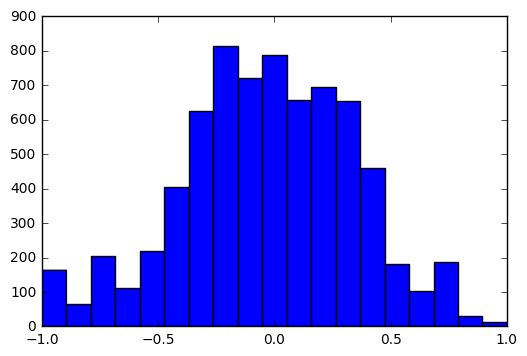

In [8]:
x, y = load_dataset()
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3)

X_train,y_train = balance_dataset(X_train,y_train)
bins = np.linspace(-1,1,num=20)
plt.hist(y_train,bins=bins)
plt.show()

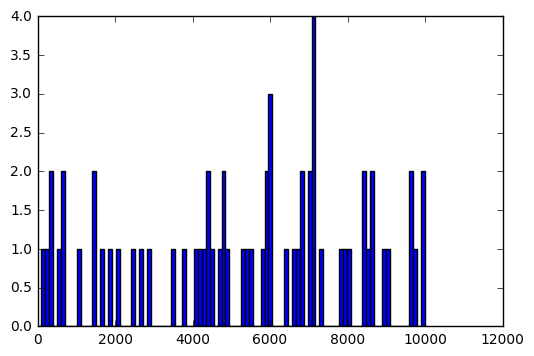

In [4]:
np.abs(-1.5) <= 1 
dd = []
for i in range(0,64):
    dd.append(int(np.random.uniform(1,10000)))

bins = np.linspace(0,10000,num=100)
plt.hist(np.array(dd),bins=bins);


In [24]:
scipy.stats.describe(y)

DescribeResult(nobs=10801, minmax=(-1.25, 1.25), mean=-0.021757193703268216, variance=0.21157150760508456, skewness=-0.03500201020800413, kurtosis=0.7157449875953708)

In [20]:
hist, bins = np.histogram(y, 50)
bins
np.random.rand()

0.616786534455618

In [310]:
x.tolist()

['./data/IMG/right_2016_12_01_13_41_05_963.jpg',
 './data/IMG/left_2016_12_01_13_40_07_535.jpg',
 './data/IMG/center_2016_12_01_13_42_03_219.jpg',
 './data/IMG/center_2016_12_01_13_34_09_385.jpg',
 './data/IMG/right_2016_12_01_13_43_52_378.jpg',
 './data/IMG/center_2016_12_01_13_44_18_128.jpg',
 './data/IMG/right_2016_12_01_13_41_11_441.jpg',
 './data/IMG/left_2016_12_01_13_38_16_884.jpg',
 './data/IMG/left_2016_12_01_13_42_18_143.jpg',
 './data/IMG/center_2016_12_01_13_36_24_872.jpg',
 './data/IMG/left_2016_12_01_13_39_29_341.jpg',
 './data/IMG/right_2016_12_01_13_33_48_481.jpg',
 './data/IMG/left_2016_12_01_13_39_27_420.jpg',
 './data/IMG/left_2016_12_01_13_40_09_558.jpg',
 './data/IMG/left_2016_12_01_13_45_53_038.jpg',
 './data/IMG/center_2016_12_01_13_40_59_381.jpg',
 './data/IMG/right_2016_12_01_13_35_21_674.jpg',
 './data/IMG/right_2016_12_01_13_42_57_890.jpg',
 './data/IMG/center_2016_12_01_13_36_52_704.jpg',
 './data/IMG/right_2016_12_01_13_39_32_080.jpg',
 './data/IMG/center_2